# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import tensorflow as tf

# Data Preprocessing

### Get and Preprocess the Training Dataset ('Teleplay.csv' and 'Rating.csv') as 'df_teleplay' and 'df_rating' dataframes

In [2]:
df_teleplay = pd.read_csv('Teleplay.csv')
df_rating = pd.read_csv('Rating.csv')

In [3]:
# print(df_teleplay.shape)
# df_teleplay

In [4]:
# print(df_rating.shape)
# df_rating

### Remove 'rating' or 'members' column values less or equal to 0, in 'df_teleplay' dataframe

In [5]:
df_teleplay = df_teleplay[df_teleplay['rating'] > 0]
df_teleplay = df_teleplay[df_teleplay['members'] > 0]

In [6]:
# print(df_teleplay.shape)
# df_teleplay

### Remove 'rating' column values less or equal to 0, in 'df_rating' dataframe

In [7]:
df_rating = df_rating[df_rating['rating'] > 0]

In [8]:
# print(df_rating.shape)
# df_rating

### Find the mean ratings for each 'teleplay_id' column values in 'df_rating' dataframe and merge such values in 'df_teleplay' dataframe on 'rating_2' column 

In [9]:
df_rating_rating_2 = pd.DataFrame(df_rating.groupby('teleplay_id')['rating'].mean())
df_rating_rating_2 = df_rating_rating_2.rename(columns={'rating': 'rating_2'})

In [10]:
# print(df_rating_rating_2.shape)
# df_rating_rating_2

In [11]:
df_teleplay = df_teleplay.merge(df_rating_rating_2, how='left', on='teleplay_id')

In [12]:
# print(df_teleplay.shape)
# df_teleplay

### Check empty values existence in 'df_teleplay' dataframe, per column

In [13]:
for i in range(df_teleplay.shape[1]):
    if df_teleplay.iloc[:,i].isnull().values.any():
        print(df_teleplay.columns[i])

genre
rating_2


##### In this case, there exists an empty value in 'genre' and 'rating_2' column values

### Drop the empty values of 'genre' column in 'df_teleplay' dataframe and check empty values existence in 'df_teleplay' dataframe, per column

In [14]:
df_teleplay = df_teleplay[df_teleplay["genre"].notna()]

In [15]:
# print(df_teleplay.shape)
# df_teleplay

In [16]:
for i in range(df_teleplay.shape[1]):
    if df_teleplay.iloc[:,i].isnull().values.any():
        print(df_teleplay.columns[i])

rating_2


##### In this case, there exists an empty value in 'rating_2' column values

### Get and Preprocess the Testing Dataset 'New_Teleplay.csv' as 'df_new_teleplay' dataframe

In [17]:
df_new_teleplay = pd.read_csv('New_Teleplay.csv')

In [18]:
# print(df_new_teleplay.shape)
# df_new_teleplay

### Merge the mean ratings for each 'teleplay_id' column values in 'df_rating' dataframe values in 'df_new_teleplay' dataframe on 'rating_2' column 

In [19]:
df_new_teleplay = df_new_teleplay.merge(df_rating_rating_2, how='left', on='teleplay_id')

In [20]:
# print(df_new_teleplay.shape)
# df_new_teleplay

### Check empty values existence in 'df_new_teleplay' dataframe, per column

In [21]:
for i in range(df_new_teleplay.shape[1]):
    if df_new_teleplay.iloc[:,i].isnull().values.any():
        print(df_new_teleplay.columns[i])

genre
type
rating
rating_2


##### In this case, there exists an empty value in 'genre' , 'type', 'rating', and 'rating_2' column values

### Replace empty values in 'df_new_teleplay' dataframe with "nan" string datatype, except 'rating' and 'rating_2' column values, and check emtpy values existence in 'df_new_teleplay' dataframe, per column

In [22]:
df_new_teleplay['genre'] = df_new_teleplay['genre'].replace(np.nan, 'nan')
df_new_teleplay['type'] = df_new_teleplay['type'].replace(np.nan, 'nan')

In [23]:
for i in range(df_new_teleplay.shape[1]):
    if df_new_teleplay.iloc[:,i].isnull().values.any():
        print(df_new_teleplay.columns[i])

rating
rating_2


##### In this case, there exists an empty value in 'rating' and 'rating_2' column values

# Predict the empty values of 'rating_2' column from 'df_teleplay' and 'df_new_teleplay' dataframes

### Split 'df_teleplay' dataframe into 'df_teleplay_train_predict_rating_2' dataframe as training dataset and 'df_teleplay_test_predict_rating_2' dataframe as test dataset

In [24]:
df_teleplay_train_predict_rating_2 = df_teleplay[df_teleplay["rating_2"].notna()].copy()
df_teleplay_train_predict_rating_2 = pd.DataFrame(df_teleplay_train_predict_rating_2)

df_teleplay_test_predict_rating_2 = df_teleplay[df_teleplay["rating_2"].isna()].copy()
df_teleplay_test_predict_rating_2 = pd.DataFrame(df_teleplay_test_predict_rating_2)

In [25]:
# print(df_teleplay_train_predict_rating_2.shape)
# df_teleplay_train_predict_rating_2

In [26]:
# print(df_teleplay_test_predict_rating_2.shape)
# df_teleplay_test_predict_rating_2

### Reset index of 'df_teleplay_train_predict_rating_2' and 'df_teleplay_test_predict_rating_2' dataframes

In [27]:
df_teleplay_train_predict_rating_2 = df_teleplay_train_predict_rating_2.reset_index(drop=True)
df_teleplay_test_predict_rating_2 = df_teleplay_test_predict_rating_2.reset_index(drop=True)

In [28]:
# print(df_teleplay_train_predict_rating_2.shape)
# df_teleplay_train_predict_rating_2

In [29]:
# print(df_teleplay_test_predict_rating_2.shape)
# df_teleplay_test_predict_rating_2

### Denote 'm_df_teleplay_train_predict_rating_2' as the total rows of the training dataset from 'df_teleplay_train_predict_rating_2' dataframe

In [30]:
m_df_teleplay_train_predict_rating_2 = df_teleplay_train_predict_rating_2.shape[0]

In [31]:
# m_df_teleplay_train_predict_rating_2

### Denote 'm_df_teleplay_test_predict_rating_2' as the total rows of the test dataset from 'df_teleplay_test_predict_rating_2'' dataframe

In [32]:
m_df_teleplay_test_predict_rating_2 = df_teleplay_test_predict_rating_2.shape[0]

In [33]:
# m_df_teleplay_test_predict_rating_2

### Split 'df_new_teleplay' dataframe into 'df_new_teleplay_train_predict_rating_2' dataframe as training dataset and 'df_new_teleplay_test_predict_rating_2' dataframe as test dataset

In [34]:
df_new_teleplay_train_predict_rating_2 = df_new_teleplay[df_new_teleplay["rating_2"].notna()].copy()
df_new_teleplay_train_predict_rating_2 = pd.DataFrame(df_new_teleplay_train_predict_rating_2)

df_new_teleplay_test_predict_rating_2 = df_new_teleplay[df_new_teleplay["rating_2"].isna()].copy()
df_new_teleplay_test_predict_rating_2 = pd.DataFrame(df_new_teleplay_test_predict_rating_2)

In [35]:
# print(df_new_teleplay_train_predict_rating_2.shape)
# df_new_teleplay_train_predict_rating_2

In [36]:
# print(df_new_teleplay_test_predict_rating_2.shape)
# df_new_teleplay_test_predict_rating_2

### Reset index of 'df_new_teleplay_train_predict_rating_2' and 'df_new_teleplay_test_predict_rating_2' dataframes

In [37]:
df_new_teleplay_train_predict_rating_2 = df_new_teleplay_train_predict_rating_2.reset_index(drop=True)
df_new_teleplay_test_predict_rating_2 = df_new_teleplay_test_predict_rating_2.reset_index(drop=True)

In [38]:
# print(df_new_teleplay_train_predict_rating_2.shape)
# df_new_teleplay_train_predict_rating_2

In [39]:
# print(df_new_teleplay_test_predict_rating_2.shape)
# df_new_teleplay_test_predict_rating_2

### Denote 'm_df_new_teleplay_train_predict_rating_2' as the total rows of the training dataset from 'df_new_teleplay_train_predict_rating_2' dataframe

In [40]:
m_df_new_teleplay_train_predict_rating_2 = df_new_teleplay_train_predict_rating_2.shape[0]

In [41]:
# m_df_new_teleplay_train_predict_rating_2

### Denote 'm_df_new_teleplay_test_predict_rating_2' as the total rows of the test dataset from 'df_new_teleplay_test_predict_rating_2' dataframe

In [42]:
m_df_new_teleplay_test_predict_rating_2 = df_new_teleplay_test_predict_rating_2.shape[0]

In [43]:
# m_df_new_teleplay_test_predict_rating_2

### Encode and Normalize the values of 'type', 'genre', and 'members' columns

##### Concatenate 'df_teleplay_train_predict_rating_2', 'df_teleplay_test_predict_rating_2', 'df_new_teleplay_train_predict_rating_2' and 'df_new_teleplay_test_predict_rating_2' dataframes as 'df_merge_encode_normalize' dataframe, for 'rating', 'rating_2', 'members', 'type', and 'genre' column values

In [44]:
df_merge_encode_normalize = pd.concat([df_teleplay_train_predict_rating_2,
                                       df_teleplay_test_predict_rating_2,
                                       df_new_teleplay_train_predict_rating_2,
                                       df_new_teleplay_test_predict_rating_2], sort=False)

In [45]:
# print(df_merge_encode_normalize.shape)
# df_merge_encode_normalize

##### Reset index of 'df_merge_encode_normalize' dataframe

In [46]:
df_merge_encode_normalize = df_merge_encode_normalize.reset_index(drop=True)

In [47]:
# print(df_merge_encode_normalize.shape)
# df_merge_encode_normalize

#### Save indexes information details about 'df_merge_encode_normalize'

In [48]:
idx_FROM_df_teleplay_train_predict_rating_2 = 0
idx_TO_df_teleplay_train_predict_rating_2 = idx_FROM_df_teleplay_train_predict_rating_2 + m_df_teleplay_train_predict_rating_2 - 1

idx_FROM_df_teleplay_test_predict_rating_2 = idx_TO_df_teleplay_train_predict_rating_2 + 1
idx_TO_df_teleplay_test_predict_rating_2 = idx_FROM_df_teleplay_test_predict_rating_2 + m_df_teleplay_test_predict_rating_2 - 1

idx_FROM_df_new_teleplay_train_predict_rating_2 = idx_TO_df_teleplay_test_predict_rating_2 + 1
idx_TO_df_new_teleplay_train_predict_rating_2 = idx_FROM_df_new_teleplay_train_predict_rating_2 + m_df_new_teleplay_train_predict_rating_2 - 1

idx_FROM_df_new_teleplay_test_predict_rating_2 = idx_TO_df_new_teleplay_train_predict_rating_2 + 1
idx_TO_df_new_teleplay_test_predict_rating_2 = idx_FROM_df_new_teleplay_test_predict_rating_2 + m_df_new_teleplay_test_predict_rating_2 - 1

In [49]:
# idx_FROM_df_teleplay_train_predict_rating_2

In [50]:
# idx_TO_df_teleplay_train_predict_rating_2

In [51]:
# idx_FROM_df_teleplay_test_predict_rating_2

In [52]:
# idx_TO_df_teleplay_test_predict_rating_2

In [53]:
# idx_FROM_df_new_teleplay_train_predict_rating_2

In [54]:
# idx_TO_df_new_teleplay_train_predict_rating_2

In [55]:
# idx_FROM_df_new_teleplay_test_predict_rating_2

In [56]:
# idx_TO_df_new_teleplay_test_predict_rating_2

##### Normalize 'rating', 'rating_2', and 'members' columns values in 'df_merge_encode_normalize' dataframe, which automatically skip the empty values

In [57]:
norm = MinMaxScaler()

normalized_rating_rating_2 = df_merge_encode_normalize[['rating','rating_2']].to_numpy()
normalized_members = df_merge_encode_normalize[['members']].to_numpy()

normalized_rating_rating_2 = norm.fit_transform(normalized_rating_rating_2)
normalized_members = norm.fit_transform(normalized_members)

In [58]:
# print(normalized_rating_rating_2.shape)
# normalized_rating_rating_2

In [59]:
# print(normalized_members.shape)
# normalized_members

##### Encode 'type' and 'genre' columns values in 'df_merge_encode_normalize' dataframe

In [60]:
enc = OneHotEncoder()

normalized_type = pd.DataFrame(enc.fit_transform(df_merge_encode_normalize[['type']]).toarray()).to_numpy()
normalized_genre = pd.DataFrame(enc.fit_transform(df_merge_encode_normalize[['genre']]).toarray()).to_numpy()

In [61]:
# print(normalized_type.shape)
# normalized_type

In [62]:
# print(normalized_genre.shape)
# normalized_genre

#### Merge normalized 'members' (normalized_members), 'rating' & 'rating_2' (normalized_rating_rating_2), and encoded 'type' and 'genre' (normalized_type & normalized_genre) columns values into 'arr_merge_encode_normalize' nparray

In [63]:
arr_merge_encode_normalize = np.concatenate((normalized_rating_rating_2,normalized_members,normalized_type,normalized_genre),axis=1)

In [64]:
# print(arr_merge_encode_normalize.shape)
# arr_merge_encode_normalize

##### Split 'arr_merge_encode_normalize' nparray into 'x_noNA_teleplay', 'x_NA_teleplay', 'y_noNA_teleplay', 'y_NA_teleplay', 'x_noNA_new_teleplay', 'x_NA_new_teleplay', 'y_noNA_new_teleplay', and 'y_NA_new_teleplay' nparrays

In [65]:
# idx_FROM_df_teleplay_train_predict_rating_2
# idx_TO_df_teleplay_train_predict_rating_2

# idx_FROM_df_teleplay_test_predict_rating_2
# idx_TO_df_teleplay_test_predict_rating_2

# idx_FROM_df_new_teleplay_train_predict_rating_2
# idx_TO_df_new_teleplay_train_predict_rating_2

# idx_FROM_df_new_teleplay_test_predict_rating_2
# idx_TO_df_new_teleplay_test_predict_rating_2

In [66]:
# Training Model Inputs
x_noNA_teleplay = arr_merge_encode_normalize[idx_FROM_df_teleplay_train_predict_rating_2 : idx_TO_df_teleplay_train_predict_rating_2 + 1, 2:]
x_noNA_teleplay = np.concatenate((arr_merge_encode_normalize[idx_FROM_df_teleplay_train_predict_rating_2 : idx_TO_df_teleplay_train_predict_rating_2 + 1, 0].reshape(-1,1),x_noNA_teleplay),axis=1)
y_noNA_teleplay = df_merge_encode_normalize.loc[idx_FROM_df_teleplay_train_predict_rating_2 : idx_TO_df_teleplay_train_predict_rating_2,'rating_2'].to_numpy().reshape(-1,1)
x_NA_teleplay = arr_merge_encode_normalize[idx_FROM_df_teleplay_test_predict_rating_2 : idx_TO_df_teleplay_test_predict_rating_2 + 1, 2:]
x_NA_teleplay = np.concatenate((arr_merge_encode_normalize[idx_FROM_df_teleplay_test_predict_rating_2 : idx_TO_df_teleplay_test_predict_rating_2 + 1, 0].reshape(-1,1),x_NA_teleplay),axis=1)
y_NA_teleplay = df_merge_encode_normalize.loc[idx_FROM_df_teleplay_test_predict_rating_2 : idx_TO_df_teleplay_test_predict_rating_2,'rating_2'].to_numpy().reshape(-1,1)

# Testing Model Inputs
x_noNA_new_teleplay = arr_merge_encode_normalize[idx_FROM_df_new_teleplay_train_predict_rating_2 : idx_TO_df_new_teleplay_train_predict_rating_2 + 1, 2:]
y_noNA_new_teleplay = df_merge_encode_normalize.loc[idx_FROM_df_new_teleplay_train_predict_rating_2 : idx_TO_df_new_teleplay_train_predict_rating_2,'rating_2'].to_numpy().reshape(-1,1)
x_NA_new_teleplay = arr_merge_encode_normalize[idx_FROM_df_new_teleplay_test_predict_rating_2 : idx_TO_df_new_teleplay_test_predict_rating_2 + 1, 2:]
y_NA_new_teleplay = df_merge_encode_normalize.loc[idx_FROM_df_new_teleplay_test_predict_rating_2 : idx_TO_df_new_teleplay_test_predict_rating_2,'rating_2'].to_numpy().reshape(-1,1)

In [67]:
### Training Model Inputs

In [68]:
# print(x_noNA_teleplay.shape)
# x_noNA_teleplay

In [69]:
# print(y_noNA_teleplay.shape)
# y_noNA_teleplay

In [70]:
# print(x_NA_teleplay.shape)
# x_NA_teleplay

In [71]:
# print(y_NA_teleplay.shape)
# y_NA_teleplay

In [72]:
### Testing Model Inputs

In [73]:
# print(x_noNA_new_teleplay.shape)
# x_noNA_new_teleplay

In [74]:
# print(y_noNA_new_teleplay.shape)
# y_noNA_new_teleplay

In [75]:
# print(x_NA_new_teleplay.shape)
# x_NA_new_teleplay

In [76]:
# print(y_NA_new_teleplay.shape)
# y_NA_new_teleplay

### Predict the empty values of 'rating_2' column from 'df_teleplay' dataframe 

#### Evaluate the model performance using the non-empty values of 'rating_2' column from 'df_teleplay' dataframe

##### Split 'x_noNA_teleplay' and 'y_noNA_teleplay' nparrays into 'x_train', 'x_test', 'y_train', and 'y_test' np arrays.

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_noNA_teleplay, 
                                                    y_noNA_teleplay, 
                                                    test_size=0.25, 
                                                    random_state=42)

##### Perform Artificial Neural Network (ANN) Model in the training dataset

In [78]:
ann = tf.keras.models.Sequential()

In [79]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [80]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [81]:
ann.add(tf.keras.layers.Dense(units=1))

In [82]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [83]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
193/193 [==============================] - 0s 2ms/step - loss: 28.0631
Epoch 2/1000
193/193 [==============================] - 0s 1ms/step - loss: 1.5125
Epoch 3/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.8941
Epoch 4/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.7736
Epoch 5/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.7001
Epoch 6/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.6487
Epoch 7/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.6088
Epoch 8/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.5789
Epoch 9/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.5527
Epoch 10/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.5315
Epoch 11/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.5118
Epoch 12/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.4959


193/193 [==============================] - 0s 1ms/step - loss: 0.3416
Epoch 195/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3437
Epoch 196/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3447
Epoch 197/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3435
Epoch 198/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3439
Epoch 199/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3432
Epoch 200/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3431
Epoch 201/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3432
Epoch 202/1000
193/193 [==============================] - 0s 2ms/step - loss: 0.3432
Epoch 203/1000
193/193 [==============================] - 0s 2ms/step - loss: 0.3424
Epoch 204/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3425
Epoch 205/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.

193/193 [==============================] - 0s 1ms/step - loss: 0.3405
Epoch 387/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3411
Epoch 388/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3407
Epoch 389/1000
193/193 [==============================] - 0s 2ms/step - loss: 0.3402
Epoch 390/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3412
Epoch 391/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3407
Epoch 392/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3410
Epoch 393/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3402
Epoch 394/1000
193/193 [==============================] - 0s 2ms/step - loss: 0.3396
Epoch 395/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3403
Epoch 396/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3405
Epoch 397/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.

193/193 [==============================] - 0s 2ms/step - loss: 0.3385
Epoch 578/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3383
Epoch 579/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3389
Epoch 580/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3393
Epoch 581/1000
193/193 [==============================] - 0s 2ms/step - loss: 0.3389
Epoch 582/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3381
Epoch 583/1000
193/193 [==============================] - 0s 2ms/step - loss: 0.3395
Epoch 584/1000
193/193 [==============================] - 0s 2ms/step - loss: 0.3398A: 0s - loss: 0.
Epoch 585/1000
193/193 [==============================] - 0s 2ms/step - loss: 0.3397
Epoch 586/1000
193/193 [==============================] - 0s 2ms/step - loss: 0.3385
Epoch 587/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3378
Epoch 588/1000
193/193 [==============================] - 0s 1ms

193/193 [==============================] - 0s 1ms/step - loss: 0.3385
Epoch 770/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3385
Epoch 771/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3373
Epoch 772/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3375
Epoch 773/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3382
Epoch 774/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3378
Epoch 775/1000
193/193 [==============================] - 0s 2ms/step - loss: 0.3389
Epoch 776/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3376
Epoch 777/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3377
Epoch 778/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3379
Epoch 779/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.3385
Epoch 780/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.

193/193 [==============================] - 0s 2ms/step - loss: 0.2970
Epoch 962/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.2956
Epoch 963/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.2961
Epoch 964/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.2953
Epoch 965/1000
193/193 [==============================] - 0s 2ms/step - loss: 0.2953
Epoch 966/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.2956
Epoch 967/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.2939
Epoch 968/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.2971
Epoch 969/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.2953
Epoch 970/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.2961
Epoch 971/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.2952
Epoch 972/1000
193/193 [==============================] - 0s 1ms/step - loss: 0.

In [84]:
y_pred = ann.predict(x_test)

In [85]:
y_pred

array([[6.788059 ],
       [7.5997834],
       [6.045343 ],
       ...,
       [6.602087 ],
       [7.294656 ],
       [8.207277 ]], dtype=float32)

In [86]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[6.78805923 6.93888889]
 [7.59978342 7.5       ]
 [6.04534292 6.        ]
 ...
 [6.60208702 6.38461538]
 [7.2946558  7.3025641 ]
 [8.2072773  8.20957096]]


##### Calculate RMSE of using ANN model in the training dataset

In [87]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [88]:
rmse

0.7051800875594707

#### Perform ANN model, with 'x_NA_teleplay' nparray as the given input values, to predict the empty values of 'rating_2' column from 'df_teleplay' dataframe

In [89]:
ann = tf.keras.models.Sequential()

In [90]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [91]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [92]:
ann.add(tf.keras.layers.Dense(units=1))

In [93]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [94]:
ann.fit(x_noNA_teleplay, y_noNA_teleplay, batch_size = 32, epochs = 1000)

Epoch 1/1000
257/257 [==============================] - 0s 2ms/step - loss: 25.3923
Epoch 2/1000
257/257 [==============================] - 1s 2ms/step - loss: 1.2492
Epoch 3/1000
257/257 [==============================] - 1s 3ms/step - loss: 0.8639
Epoch 4/1000
257/257 [==============================] - 0s 2ms/step - loss: 0.7516
Epoch 5/1000
257/257 [==============================] - 1s 2ms/step - loss: 0.6844
Epoch 6/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.6363
Epoch 7/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.5989
Epoch 8/1000
257/257 [==============================] - 1s 2ms/step - loss: 0.5698
Epoch 9/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.5458
Epoch 10/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.5245
Epoch 11/1000
257/257 [==============================] - 0s 2ms/step - loss: 0.5064
Epoch 12/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.4885


257/257 [==============================] - 0s 1ms/step - loss: 0.3381
Epoch 195/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3384
Epoch 196/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3380
Epoch 197/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3381
Epoch 198/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3384
Epoch 199/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3381
Epoch 200/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3383
Epoch 201/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3378
Epoch 202/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3374
Epoch 203/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3386
Epoch 204/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3394
Epoch 205/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.

257/257 [==============================] - 0s 1ms/step - loss: 0.3356
Epoch 387/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3370
Epoch 388/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3362
Epoch 389/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3353
Epoch 390/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3367
Epoch 391/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3360
Epoch 392/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3358
Epoch 393/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3368
Epoch 394/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3370
Epoch 395/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3359
Epoch 396/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3356
Epoch 397/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.

257/257 [==============================] - 0s 1ms/step - loss: 0.3349
Epoch 483/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3348
Epoch 484/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3351
Epoch 485/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3350
Epoch 486/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3347
Epoch 487/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3350
Epoch 488/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3344
Epoch 489/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3344
Epoch 490/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3345
Epoch 491/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3342
Epoch 492/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3347
Epoch 493/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.

257/257 [==============================] - 0s 1ms/step - loss: 0.3270
Epoch 675/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3255
Epoch 676/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3264
Epoch 677/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3251
Epoch 678/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3251
Epoch 679/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3247
Epoch 680/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3240
Epoch 681/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3244
Epoch 682/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3247
Epoch 683/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3245
Epoch 684/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3237
Epoch 685/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.

257/257 [==============================] - 0s 1ms/step - loss: 0.3104
Epoch 867/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3099
Epoch 868/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3104
Epoch 869/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3102
Epoch 870/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3110
Epoch 871/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3107
Epoch 872/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3103
Epoch 873/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3094
Epoch 874/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3101
Epoch 875/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3107
Epoch 876/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.3102
Epoch 877/1000
257/257 [==============================] - 0s 1ms/step - loss: 0.

In [95]:
y_NA_teleplay = ann.predict(x_NA_teleplay)

In [96]:
y_NA_teleplay

array([[8.822139 ],
       [8.271126 ],
       [8.801844 ],
       ...,
       [4.8586307],
       [4.32671  ],
       [5.119955 ]], dtype=float32)

#### Replace the empty values with the predicted values of 'y_NA_teleplay' nparray to 'df_teleplay_test_predict_rating_2' dataframe of 'rating_2' column

In [97]:
df_teleplay_test_predict_rating_2['rating_2'] = pd.DataFrame(y_NA_teleplay)

In [98]:
# print(df_teleplay_test_predict_rating_2.shape)
# df_teleplay_test_predict_rating_2

#### Concatenate 'df_teleplay_train_predict_rating_2' and 'df_teleplay_test_predict_rating_2' dataframes as 'df_teleplay' dataframe

In [99]:
df_teleplay = pd.concat([df_teleplay_train_predict_rating_2, df_teleplay_test_predict_rating_2], sort=False)
df_teleplay = df_teleplay.reset_index(drop=True)

In [100]:
# print(df_teleplay.shape)
# df_teleplay

In [101]:
# x_noNA_new_teleplay.shape

In [102]:
# y_noNA_new_teleplay.shape

In [103]:
# x_noNA_teleplay.shape

In [104]:
# y_noNA_teleplay.shape

### Predict the empty values of 'rating_2' column from 'df_new_teleplay' dataframe 

#### Evaluate the model performance using the non-empty values of 'rating_2' column from 'df_new_teleplay' dataframe

#### Combine 'x_noNA_new_teleplay' with 'x_noNA_teleplay' (excluding 'rating' column values)

In [105]:
x_noNA_new_teleplay = np.concatenate((x_noNA_new_teleplay,x_noNA_teleplay[:,1:]))

In [106]:
y_noNA_new_teleplay = np.concatenate((y_noNA_new_teleplay,y_noNA_teleplay))

In [107]:
# x_noNA_new_teleplay.shape

In [108]:
# y_noNA_new_teleplay.shape

##### Split 'x_noNA_new_teleplay' and 'y_noNA_new_teleplay' nparrays into 'x_train', 'x_test', 'y_train', and 'y_test' np arrays.

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x_noNA_new_teleplay, 
                                                    y_noNA_new_teleplay, 
                                                    test_size=0.25, 
                                                    random_state=42)

##### Perform Artificial Neural Network (ANN) Model in the training dataset

In [110]:
ann = tf.keras.models.Sequential()

In [111]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [112]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [113]:
ann.add(tf.keras.layers.Dense(units=1))

In [114]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [115]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
232/232 [==============================] - 0s 1ms/step - loss: 35.1273
Epoch 2/1000
232/232 [==============================] - 0s 1ms/step - loss: 4.0685
Epoch 3/1000
232/232 [==============================] - 0s 1ms/step - loss: 1.3737
Epoch 4/1000
232/232 [==============================] - 0s 1ms/step - loss: 1.1725
Epoch 5/1000
232/232 [==============================] - 0s 1ms/step - loss: 1.0683
Epoch 6/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.9995
Epoch 7/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.9528
Epoch 8/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.9158
Epoch 9/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.8899
Epoch 10/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.8684
Epoch 11/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.8516
Epoch 12/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.8379


232/232 [==============================] - 0s 1ms/step - loss: 0.6704
Epoch 195/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6695
Epoch 196/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6698
Epoch 197/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6689
Epoch 198/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6701
Epoch 199/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6713
Epoch 200/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6699
Epoch 201/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6705
Epoch 202/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6681
Epoch 203/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6690
Epoch 204/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6682
Epoch 205/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

232/232 [==============================] - 0s 1ms/step - loss: 0.6612
Epoch 291/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6617
Epoch 292/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6612
Epoch 293/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6617
Epoch 294/1000
232/232 [==============================] - 0s 978us/step - loss: 0.6594
Epoch 295/1000
232/232 [==============================] - 0s 980us/step - loss: 0.6597
Epoch 296/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6598
Epoch 297/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6586
Epoch 298/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6599
Epoch 299/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6592
Epoch 300/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6601
Epoch 301/1000
232/232 [==============================] - 0s 1ms/step - loss

232/232 [==============================] - 0s 1ms/step - loss: 0.6469
Epoch 387/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6467
Epoch 388/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6455
Epoch 389/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6472
Epoch 390/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6454
Epoch 391/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6462
Epoch 392/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6457
Epoch 393/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6446
Epoch 394/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6458
Epoch 395/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6448
Epoch 396/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6464
Epoch 397/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

Epoch 482/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6275
Epoch 483/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6272
Epoch 484/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.6275
Epoch 485/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6281
Epoch 486/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6275
Epoch 487/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6297
Epoch 488/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6279
Epoch 489/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.6283
Epoch 490/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6287
Epoch 491/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6262
Epoch 492/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6264
Epoch 493/1000
232/232 [==============================] - 0s 1ms/

232/232 [==============================] - 0s 1ms/step - loss: 0.6113
Epoch 675/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6119
Epoch 676/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6127
Epoch 677/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6119
Epoch 678/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6097
Epoch 679/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6120
Epoch 680/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6107
Epoch 681/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6129
Epoch 682/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6112
Epoch 683/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6097
Epoch 684/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6101
Epoch 685/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

232/232 [==============================] - 0s 1ms/step - loss: 0.5980
Epoch 865/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5986A: 0s - loss: 0.5
Epoch 866/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5988
Epoch 867/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5971
Epoch 868/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5995
Epoch 869/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5983
Epoch 870/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6002
Epoch 871/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5974
Epoch 872/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5990
Epoch 873/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5990
Epoch 874/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5983
Epoch 875/1000
232/232 [==============================] - 0s 1m

232/232 [==============================] - 0s 1ms/step - loss: 0.5965
Epoch 961/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5939
Epoch 962/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5948
Epoch 963/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5936
Epoch 964/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5947
Epoch 965/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5941
Epoch 966/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.5935
Epoch 967/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5957
Epoch 968/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5955
Epoch 969/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5954
Epoch 970/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5946
Epoch 971/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

In [116]:
y_pred = ann.predict(x_test)

In [117]:
y_pred

array([[6.8402424],
       [6.8910856],
       [7.002898 ],
       ...,
       [7.671871 ],
       [6.4905853],
       [6.4722395]], dtype=float32)

In [118]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[6.84024239 7.        ]
 [6.89108562 5.        ]
 [7.00289822 6.9561753 ]
 ...
 [7.67187119 7.26079734]
 [6.49058533 6.2       ]
 [6.47223949 7.18274112]]


##### Calculate RMSE of using ANN model in the training dataset

In [119]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [120]:
rmse

1.0958634072744535

#### Perform ANN model, with 'x_NA_new_teleplay' nparray as the given input values, to predict the empty values of 'rating_2' column from 'df_new_teleplay' dataframe

In [121]:
ann = tf.keras.models.Sequential()

In [122]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [123]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [124]:
ann.add(tf.keras.layers.Dense(units=1))

In [125]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [126]:
ann.fit(x_noNA_new_teleplay, y_noNA_new_teleplay, batch_size = 32, epochs = 1000)

Epoch 1/1000
310/310 [==============================] - 0s 1ms/step - loss: 33.2176
Epoch 2/1000
310/310 [==============================] - 0s 1ms/step - loss: 2.6427
Epoch 3/1000
310/310 [==============================] - 0s 1ms/step - loss: 1.2770
Epoch 4/1000
310/310 [==============================] - 0s 1ms/step - loss: 1.1198
Epoch 5/1000
310/310 [==============================] - 0s 1ms/step - loss: 1.0333
Epoch 6/1000
310/310 [==============================] - 0s 2ms/step - loss: 0.9775
Epoch 7/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.9369
Epoch 8/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.9080
Epoch 9/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.8851
Epoch 10/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.8682
Epoch 11/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.8530
Epoch 12/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.8417


310/310 [==============================] - 0s 1ms/step - loss: 0.6610
Epoch 195/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.6602
Epoch 196/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.6606
Epoch 197/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.6593
Epoch 198/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.6594
Epoch 199/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.6574
Epoch 200/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.6570
Epoch 201/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.6577
Epoch 202/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.6558
Epoch 203/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.6546
Epoch 204/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.6535
Epoch 205/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.

310/310 [==============================] - 0s 1ms/step - loss: 0.5803
Epoch 387/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5804
Epoch 388/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5781
Epoch 389/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5799
Epoch 390/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5773
Epoch 391/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5783
Epoch 392/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5768
Epoch 393/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5795
Epoch 394/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5762
Epoch 395/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5767
Epoch 396/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5761
Epoch 397/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.

310/310 [==============================] - 0s 1ms/step - loss: 0.5449
Epoch 579/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5459
Epoch 580/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5421
Epoch 581/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5435
Epoch 582/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5446
Epoch 583/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5405
Epoch 584/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5433
Epoch 585/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5445
Epoch 586/1000
310/310 [==============================] - 0s 2ms/step - loss: 0.5403
Epoch 587/1000
310/310 [==============================] - 0s 2ms/step - loss: 0.5417
Epoch 588/1000
310/310 [==============================] - 0s 2ms/step - loss: 0.5418
Epoch 589/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.

310/310 [==============================] - 1s 2ms/step - loss: 0.5216
Epoch 771/1000
310/310 [==============================] - 1s 2ms/step - loss: 0.5224
Epoch 772/1000
310/310 [==============================] - 0s 2ms/step - loss: 0.5204
Epoch 773/1000
310/310 [==============================] - 0s 2ms/step - loss: 0.5196
Epoch 774/1000
310/310 [==============================] - 0s 2ms/step - loss: 0.5227
Epoch 775/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5234
Epoch 776/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5216
Epoch 777/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5216
Epoch 778/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5221
Epoch 779/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5263
Epoch 780/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5209
Epoch 781/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.

310/310 [==============================] - 0s 1ms/step - loss: 0.5117
Epoch 963/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5108
Epoch 964/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5105
Epoch 965/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5094
Epoch 966/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5102
Epoch 967/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5130
Epoch 968/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5102
Epoch 969/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5122
Epoch 970/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5119
Epoch 971/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5127
Epoch 972/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.5138
Epoch 973/1000
310/310 [==============================] - 0s 1ms/step - loss: 0.

In [127]:
y_new_NA_teleplay = ann.predict(x_NA_new_teleplay)

In [128]:
y_new_NA_teleplay

array([[ 5.5482564 ],
       [ 4.6932425 ],
       [ 5.9680376 ],
       [ 6.5621343 ],
       [ 5.294987  ],
       [ 7.1736917 ],
       [ 5.716505  ],
       [ 5.6119804 ],
       [ 4.2814884 ],
       [ 7.0163546 ],
       [ 5.5495877 ],
       [ 6.861893  ],
       [ 6.8470373 ],
       [ 6.822173  ],
       [ 5.6994834 ],
       [ 5.7789083 ],
       [ 5.9327188 ],
       [ 5.68455   ],
       [ 6.0331445 ],
       [ 5.2701387 ],
       [ 5.788876  ],
       [ 5.295074  ],
       [ 6.101444  ],
       [ 6.3677487 ],
       [ 7.279346  ],
       [ 5.0196004 ],
       [ 4.1219563 ],
       [ 5.6888614 ],
       [ 6.988166  ],
       [ 6.9868865 ],
       [ 6.3509784 ],
       [ 5.6109414 ],
       [ 5.785526  ],
       [ 5.872646  ],
       [ 5.9662457 ],
       [ 5.6715417 ],
       [-1.4311634 ],
       [ 5.7738514 ],
       [-1.3687336 ],
       [ 6.509365  ],
       [ 5.8909583 ],
       [ 6.846906  ],
       [ 4.104457  ],
       [ 6.410988  ],
       [ 7.513807  ],
       [ 6

#### Replace the empty values with the predicted values of 'y_NA_new_teleplay' nparray to 'df_new_teleplay_test_predict_rating_2' dataframe of 'rating_2' column

In [129]:
df_new_teleplay_test_predict_rating_2['rating_2'] = pd.DataFrame(y_new_NA_teleplay)

In [130]:
# print(df_new_teleplay_test_predict_rating_2.shape)
# df_new_teleplay_test_predict_rating_2

#### Concatenate 'df_new_teleplay_train_predict_rating_2' and 'df_new_teleplay_test_predict_rating_2' dataframes as 'df_new_teleplay' dataframe

In [131]:
df_new_teleplay = pd.concat([df_new_teleplay_train_predict_rating_2, df_new_teleplay_test_predict_rating_2], sort=False)
df_new_teleplay = df_new_teleplay.reset_index(drop=True)

In [132]:
# print(df_new_teleplay.shape)
# df_new_teleplay

### Check empty values existence in 'df_teleplay' dataframe, per column

In [133]:
for i in range(df_teleplay.shape[1]):
    if df_teleplay.iloc[:,i].isnull().values.any():
        print(df_teleplay.columns[i])

##### In this case, there does not exist an empty value

### Check empty values existence in 'df_new_teleplay' dataframe, per column

In [134]:
for i in range(df_new_teleplay.shape[1]):
    if df_new_teleplay.iloc[:,i].isnull().values.any():
        print(df_new_teleplay.columns[i])

rating


##### In this case, there exists an empty value in 'rating' column values

# Exploratory Data Analysis (EDA)

### Describe the values of 'df_teleplay' dataframe on 'members' and 'rating'columns

In [135]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
print(df_teleplay['members'].describe())

count      9972.000
mean      18348.949
std       55134.308
min          17.000
25%         224.000
50%        1525.500
75%        9483.250
max     1013917.000
Name: members, dtype: float64


In [136]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
print(df_teleplay['rating'].describe())

count   9972.000
mean       6.479
std        1.024
min        1.670
25%        5.880
50%        6.570
75%        7.180
max        9.600
Name: rating, dtype: float64


### Visualize the trend and correlations among datapoints of 'df_teleplay' dataframe

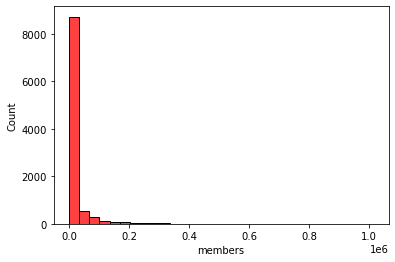

In [137]:
sns.histplot(df_teleplay['members'],bins=30,color='red')

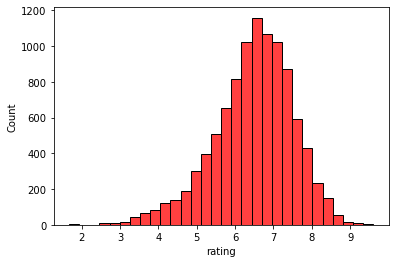

In [138]:
sns.histplot(df_teleplay['rating'],bins=30,color='red')

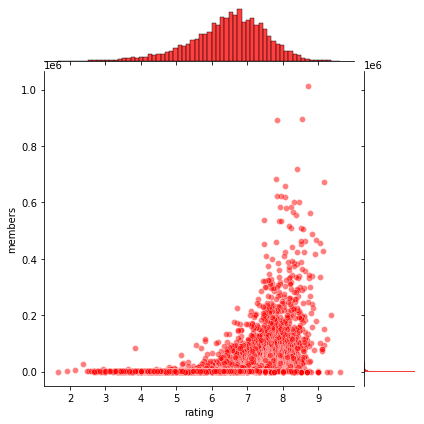

In [141]:
sns.jointplot(x='rating',y='members',data=df_teleplay,alpha=0.5,color='red')

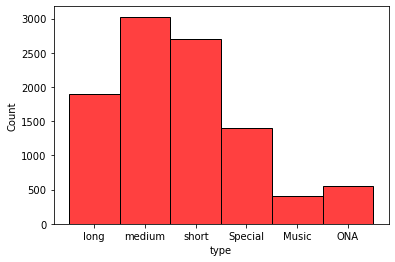

In [140]:
sns.histplot(df_teleplay['type'],color='red')

### Get the total ratings of each teleplay, from 'members' column values, of 'df_teleplay' dataframe

In [142]:
df_teleplay.groupby('name')['members'].mean().sort_values(ascending=False)

name
Death Note                              1013917
Shingeki no Kyojin                       896229
Sword Art Online                         893100
Angel Beats!                             717796
Naruto                                   683297
                                         ...   
Ten ni Yaka Reru: E ni Yoru Shougen          20
Gakushuu Animation Nihon Koku Kenpou         20
Ocha-ken: Ryokutto Monogatari                20
Neko no Kuni no Kenpou                       20
Chotto Ugoku!? &quot;Futeneko&quot;          17
Name: members, Length: 9970, dtype: int64

### Get the average ratings of each teleplay, from 'rating' column values, of 'df_teleplay' dataframe

In [143]:
# Get the average rating of each movie, from 'rating'
df_teleplay.groupby('name')['rating'].mean().sort_values(ascending=False)

name
Spoon-hime no Swing Kitchen          9.600
Kimi no Na wa.                       9.370
Kahei no Umi                         9.330
Yakusoku: Africa Mizu to Midori      9.250
Gintama°                             9.250
                                      ... 
Roboteuwang Sseonsyakeu              2.490
Hametsu no Mars                      2.370
Utsu Musume Sayuri                   2.140
Hi Gekiga Ukiyoe Senya Ichiya        1.920
Platonic Chain: Ansatsu Jikkouchuu   1.670
Name: rating, Length: 9970, dtype: float64

### Get the total genre counts of each teleplay, from 'genre' column values, of 'df_teleplay' dataframe

In [144]:
# Working with the genre column
genre_temp = df_teleplay['genre'].str.strip('[]').replace(' ','').replace("'",'')
genre_temp = genre_temp.str.split(',')

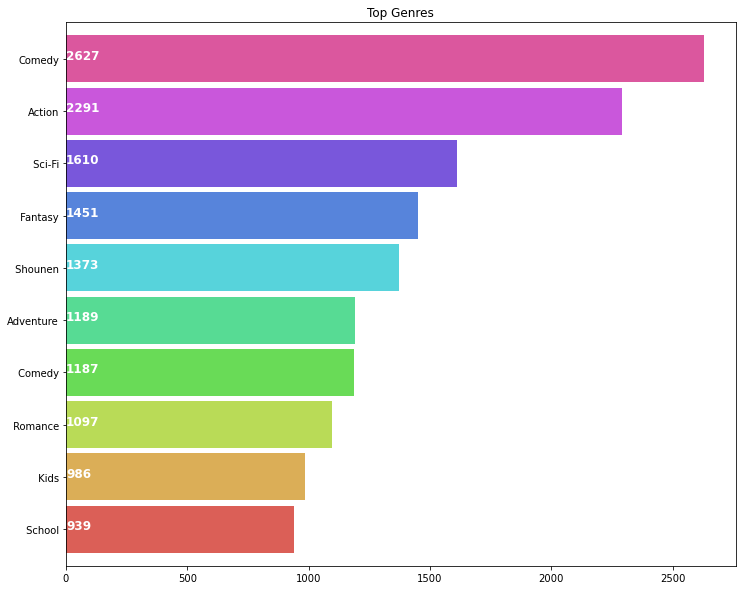

In [145]:
plt.subplots(figsize=(12,10))
list1 = []
for i in genre_temp:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

# Task 1: Predict the empty values of 'rating' column from 'df_new_teleplay' dataframe

In [146]:
# df_teleplay

##### Concatenate 'df_teleplay' and 'df_new_teleplay' dataframes as 'df_merge_encode_normalize' dataframe, for 'rating_2', 'members', 'type', and 'genre' column values

In [147]:
df_merge_encode_normalize = pd.concat([df_teleplay,
                                       df_new_teleplay],
                                       sort=False)

In [148]:
# print(df_merge_encode_normalize.shape)
# df_merge_encode_normalize

##### Reset index of 'df_merge_encode_normalize' dataframe

In [149]:
df_merge_encode_normalize = df_merge_encode_normalize.reset_index(drop=True)

In [150]:
# print(df_merge_encode_normalize.shape)
# df_merge_encode_normalize

#### Save indexes information details about 'df_merge_encode_normalize'

In [151]:
m_df_teleplay = df_teleplay.shape[0]
m_df_new_teleplay = df_new_teleplay.shape[0]

In [152]:
idx_FROM_df_teleplay = 0
idx_TO_df_teleplay = idx_FROM_df_teleplay + m_df_teleplay - 1

idx_FROM_df_new_teleplay = idx_TO_df_teleplay + 1
idx_TO_df_new_teleplay = idx_FROM_df_new_teleplay + m_df_new_teleplay - 1

In [153]:
# idx_FROM_df_teleplay

In [154]:
# idx_TO_df_teleplay

In [155]:
# idx_FROM_df_new_teleplay

In [156]:
# idx_TO_df_new_teleplay

##### Normalize 'rating_2', and 'members' columns values

In [157]:
norm = MinMaxScaler()

normalized_rating_2_members = df_merge_encode_normalize[['rating_2','members']].to_numpy()
normalized_rating_2_members = norm.fit_transform(normalized_rating_2_members)

In [158]:
# print(normalized_rating_2_members.shape)
# normalized_rating_2_members

##### Encode 'type' and 'genre' columns values 

In [159]:
enc = OneHotEncoder()

normalized_type_genre = pd.DataFrame(enc.fit_transform(df_merge_encode_normalize[['type','genre']]).toarray()).to_numpy()

In [160]:
# print(normalized_type_genre.shape)
# normalized_type_genre

#### Merge normalized 'rating_2', and 'members' (normalized_rating_rating_2_members), and encoded 'type' and 'genre' (normalized_type_genre) columns values into 'arr_merge_encode_normalize' nparray

In [161]:
arr_merge_encode_normalize = np.concatenate((normalized_rating_2_members,normalized_type_genre),axis=1)

In [162]:
# print(arr_merge_encode_normalize.shape)
# arr_merge_encode_normalize

##### Split 'arr_merge_encode_normalize' nparray into 'x_teleplay', 'y_teleplay', 'x_new_teleplay', 'y_new_teleplay'

In [163]:
# idx_FROM_df_teleplay
# idx_TO_df_teleplay

# idx_FROM_df_new_teleplay
# idx_TO_df_new_teleplay

In [164]:
# Training Model Inputs
x_teleplay = arr_merge_encode_normalize[idx_FROM_df_teleplay : idx_TO_df_teleplay + 1]
y_teleplay = df_teleplay['rating'].to_numpy().reshape(-1,1)

# Testing Model Inputs
x_new_teleplay = arr_merge_encode_normalize[idx_FROM_df_new_teleplay : idx_TO_df_new_teleplay + 1]
y_new_teleplay = df_new_teleplay['rating'].to_numpy().reshape(-1,1)

In [165]:
# print(x_teleplay.shape)
# x_teleplay

In [166]:
# print(y_teleplay.shape)
# y_teleplay

In [167]:
# print(x_new_teleplay.shape)
# x_new_teleplay

In [168]:
# print(y_new_teleplay.shape)
# y_new_teleplay

### Evaluate the model performance from 'df_teleplay' dataframe

##### Split 'x_teleplay' and 'y_teleplay' nparrays into 'x_train', 'x_test', 'y_train', and 'y_test' np arrays.

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x_teleplay, 
                                                    y_teleplay, 
                                                    test_size=0.25, 
                                                    random_state=42)

##### Perform Artificial Neural Network (ANN) Model in the training dataset

In [170]:
ann = tf.keras.models.Sequential()

In [171]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [172]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [173]:
ann.add(tf.keras.layers.Dense(units=1))

In [174]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [175]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
234/234 [==============================] - 0s 1ms/step - loss: 24.5631
Epoch 2/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.9711
Epoch 3/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.5382
Epoch 4/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.4359
Epoch 5/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.3802
Epoch 6/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.3439
Epoch 7/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.3172
Epoch 8/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.2962
Epoch 9/1000
234/234 [==============================] - 0s 2ms/step - loss: 0.2792
Epoch 10/1000
234/234 [==============================] - 0s 2ms/step - loss: 0.2650
Epoch 11/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.2523
Epoch 12/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.2419


234/234 [==============================] - 0s 1ms/step - loss: 0.1665
Epoch 195/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1670
Epoch 196/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1667
Epoch 197/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1666
Epoch 198/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1667
Epoch 199/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1678
Epoch 200/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1665
Epoch 201/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1665
Epoch 202/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1670
Epoch 203/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1664
Epoch 204/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1671
Epoch 205/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.

234/234 [==============================] - 0s 1ms/step - loss: 0.1653
Epoch 387/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1667
Epoch 388/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1651
Epoch 389/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1652
Epoch 390/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1649
Epoch 391/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1648
Epoch 392/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1665
Epoch 393/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1652
Epoch 394/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1650
Epoch 395/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1653
Epoch 396/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1645
Epoch 397/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.

234/234 [==============================] - 0s 1ms/step - loss: 0.1639
Epoch 579/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1635
Epoch 580/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1639
Epoch 581/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1644
Epoch 582/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1644
Epoch 583/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1641
Epoch 584/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1643
Epoch 585/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1637
Epoch 586/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1651
Epoch 587/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1639
Epoch 588/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1641
Epoch 589/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.

234/234 [==============================] - 0s 1ms/step - loss: 0.1638
Epoch 771/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1644
Epoch 772/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1640
Epoch 773/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1638
Epoch 774/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1633
Epoch 775/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1637
Epoch 776/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1640
Epoch 777/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1634
Epoch 778/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1641
Epoch 779/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1634
Epoch 780/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1642
Epoch 781/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.

234/234 [==============================] - 0s 1ms/step - loss: 0.1632
Epoch 963/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1635
Epoch 964/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1636
Epoch 965/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1635
Epoch 966/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1644
Epoch 967/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1637
Epoch 968/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1640
Epoch 969/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1635
Epoch 970/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1634
Epoch 971/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1637
Epoch 972/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.1638
Epoch 973/1000
234/234 [==============================] - 0s 1ms/step - loss: 0.

In [176]:
y_pred = ann.predict(x_test)

In [177]:
y_pred

array([[6.821789 ],
       [7.2162075],
       [6.359475 ],
       ...,
       [7.115814 ],
       [5.5726857],
       [5.9618635]], dtype=float32)

In [178]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[6.82178879 6.8       ]
 [7.2162075  7.12      ]
 [6.35947514 6.48      ]
 ...
 [7.11581421 7.52      ]
 [5.57268572 5.        ]
 [5.96186352 5.53      ]]


##### Calculate RMSE of using ANN model in the training dataset

In [179]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [180]:
rmse

0.49096476235066167

### Perform ANN model, with 'x_new_teleplay' nparray as the given input values, to predict the values of 'rating' column from 'df_new_teleplay' dataframe

In [181]:
ann = tf.keras.models.Sequential()

In [182]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [183]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [184]:
ann.add(tf.keras.layers.Dense(units=1))

In [185]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [186]:
ann.fit(x_teleplay, y_teleplay, batch_size = 32, epochs = 1000)

Epoch 1/1000
312/312 [==============================] - 0s 1ms/step - loss: 14.6488
Epoch 2/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.5518
Epoch 3/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.4109
Epoch 4/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.3493
Epoch 5/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.3114
Epoch 6/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.2837
Epoch 7/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.2628
Epoch 8/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.2457
Epoch 9/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.2321
Epoch 10/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.2202
Epoch 11/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.2105
Epoch 12/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.2029


312/312 [==============================] - 0s 1ms/step - loss: 0.1708
Epoch 195/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1708
Epoch 196/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1708
Epoch 197/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1703
Epoch 198/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1702
Epoch 199/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1707
Epoch 200/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1706
Epoch 201/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1708
Epoch 202/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1707
Epoch 203/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1705
Epoch 204/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1705
Epoch 205/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.

312/312 [==============================] - 0s 1ms/step - loss: 0.1688
Epoch 387/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1688
Epoch 388/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1691
Epoch 389/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1689
Epoch 390/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1685
Epoch 391/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1686
Epoch 392/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1685
Epoch 393/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1689
Epoch 394/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1687
Epoch 395/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1693
Epoch 396/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1685
Epoch 397/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.

312/312 [==============================] - 0s 1ms/step - loss: 0.1675
Epoch 579/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1679
Epoch 580/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1672
Epoch 581/1000
312/312 [==============================] - 0s 982us/step - loss: 0.1675 0s - loss: 0.
Epoch 582/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1668
Epoch 583/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1673
Epoch 584/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1665
Epoch 585/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1669
Epoch 586/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1666
Epoch 587/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1664
Epoch 588/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1664
Epoch 589/1000
312/312 [==============================] - 0s 1ms

312/312 [==============================] - 0s 1ms/step - loss: 0.1308
Epoch 771/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1305
Epoch 772/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 773/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1298
Epoch 774/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1303
Epoch 775/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1307
Epoch 776/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1303
Epoch 777/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1304
Epoch 778/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1301
Epoch 779/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 780/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 781/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.

312/312 [==============================] - 0s 1ms/step - loss: 0.1281
Epoch 963/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1276
Epoch 964/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1276
Epoch 965/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1277
Epoch 966/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1276
Epoch 967/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1274
Epoch 968/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1282
Epoch 969/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1279
Epoch 970/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1278
Epoch 971/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1275
Epoch 972/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.1276
Epoch 973/1000
312/312 [==============================] - 0s 1ms/step - loss: 0.

In [187]:
y_new_teleplay = ann.predict(x_new_teleplay)

In [188]:
y_new_teleplay

array([[7.2458353],
       [6.3536925],
       [5.882967 ],
       ...,
       [6.2966843],
       [6.3531775],
       [7.0049253]], dtype=float32)

### Replace the values with the predicted values of 'y_new_teleplay' nparray to 'df_new_teleplay' dataframe of 'rating' column

In [189]:
df_new_teleplay['rating'] = pd.DataFrame(y_new_teleplay)

In [190]:
# print(df_new_teleplay.shape)
# df_new_teleplay

### Submission

In [191]:
df_new_teleplay.to_csv('18079969D_task1.csv', index=False)

# Task 2: Predict user 53698’s personalized rating of all teleplays

In [192]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

### Get the average rating of each teleplay, based on the rating of each user, to each teleplay in rating.csv

In [193]:
df_merge_temp = pd.merge(df_teleplay,df_rating,on='teleplay_id')
df_merge_temp = df_merge_temp.rename(columns = {"rating_y": "rating_per_user_id"})

### Normalize the values of 'rating_per_user_id' and perform aggregation to get the input values for collaborative filtering

In [194]:
rating_norm = df_merge_temp["rating_per_user_id"]
play_count_scaled = (rating_norm - rating_norm.min()) / (rating_norm.max() - rating_norm.min())

df_merge_temp = df_merge_temp.assign(rating_per_user_id=play_count_scaled)

ratings_df = df_merge_temp.pivot_table(index=['user_id'],columns=['teleplay_id'],values='rating_per_user_id')
ratings = ratings_df.fillna(0).values

sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('{:.2f}%'.format(sparsity))

0.92%


In [195]:
# ratings

In [196]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

def train_test_split(ratings):
    
    validation = np.zeros(ratings.shape)
    train = ratings.copy()
    
    for user in np.arange(ratings.shape[0]):
        if len(ratings[user,:].nonzero()[0]) >= MIN_USER_RATINGS:
            val_ratings = np.random.choice(
                ratings[user, :].nonzero()[0], 
                size=DELETE_RATING_COUNT,
                replace=False
            )
            train[user, val_ratings] = 0
            validation[user, val_ratings] = ratings[user, val_ratings]
    return train, validation

In [197]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [198]:
class Recommender:

    def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
        self.n_epochs = n_epochs
        self.n_latent_features = n_latent_features
        self.lmbda = lmbda
        self.learning_rate = learning_rate
        
    def predictions(self, P, Q):
        return np.dot(P.T, Q)

    def fit(self, X_train, X_val):
        m, n = X_train.shape

        self.P = 3 * np.random.rand(self.n_latent_features, m)
        self.Q = 3 * np.random.rand(self.n_latent_features, n)

        self.train_error = []
        self.val_error = []

        users, items = X_train.nonzero()

        for epoch in range(self.n_epochs):
            print("Current Iteration: ", epoch+1)
            for u, i in zip(users, items):
                error = X_train[u, i] - self.predictions(self.P[:,u], self.Q[:,i])
                self.P[:, u] += self.learning_rate * (error * self.Q[:, i] - self.lmbda * self.P[:, u])
                self.Q[:, i] += self.learning_rate * (error * self.P[:, u] - self.lmbda * self.Q[:, i])

            train_rmse = rmse(self.predictions(self.P, self.Q), X_train)
            val_rmse = rmse(self.predictions(self.P, self.Q), X_val)
            self.train_error.append(train_rmse)
            self.val_error.append(val_rmse)

        return self

    def predict(self, X_train, user_index):
        y_hat = self.predictions(self.P, self.Q)
        predictions_index = np.where(X_train[user_index, :] == 0)[0]
        return y_hat[user_index, predictions_index].flatten()

In [199]:
train, val = train_test_split(ratings)
train.shape

(69040, 8200)

### Perform Collaborative Filtering Model in the training dataset.

In [200]:
recommender = Recommender(n_epochs=100, lmbda=0.0001).fit(train, val)

Current Iteration:  1
Current Iteration:  2
Current Iteration:  3
Current Iteration:  4
Current Iteration:  5
Current Iteration:  6
Current Iteration:  7
Current Iteration:  8
Current Iteration:  9
Current Iteration:  10
Current Iteration:  11
Current Iteration:  12
Current Iteration:  13
Current Iteration:  14
Current Iteration:  15
Current Iteration:  16
Current Iteration:  17
Current Iteration:  18
Current Iteration:  19
Current Iteration:  20
Current Iteration:  21
Current Iteration:  22
Current Iteration:  23
Current Iteration:  24
Current Iteration:  25
Current Iteration:  26
Current Iteration:  27
Current Iteration:  28
Current Iteration:  29
Current Iteration:  30
Current Iteration:  31
Current Iteration:  32
Current Iteration:  33
Current Iteration:  34
Current Iteration:  35
Current Iteration:  36
Current Iteration:  37
Current Iteration:  38
Current Iteration:  39
Current Iteration:  40
Current Iteration:  41
Current Iteration:  42
Current Iteration:  43
Current Iteration:  

### Plot the RMSE value of using the Collaborative Filtering model in the training dataset with the number of epochs

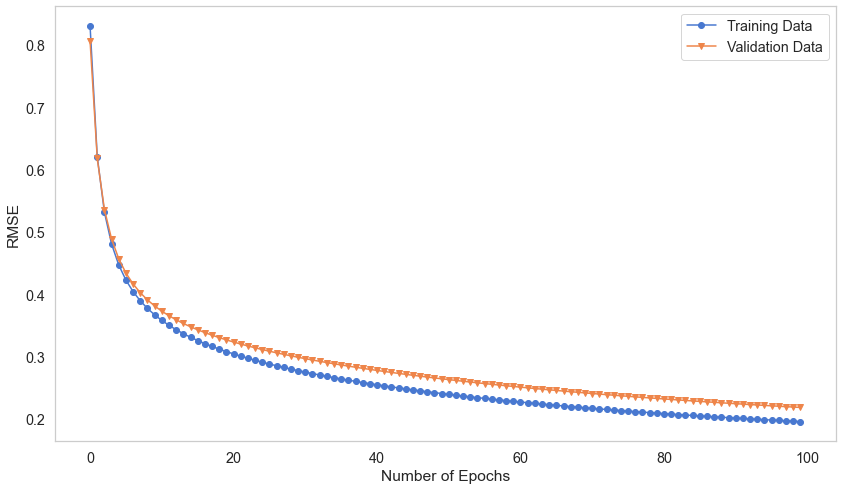

In [201]:
plt.plot(range(recommender.n_epochs), recommender.train_error, marker='o', label='Training Data');
plt.plot(range(recommender.n_epochs), recommender.val_error, marker='v', label='Validation Data');
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [204]:
def create_teleplay_ratings(teleplay_df, teleplay_index, ratings, n=10):
    teleplay_ids = ratings_df.columns[teleplay_index]
    teleplay_ratings = pd.DataFrame(data=dict(teleplayId=teleplay_ids, rating=ratings))
    top_n_teleplays = teleplay_ratings.sort_values("rating", ascending=False).head(n)
    
    teleplay_recommendations = teleplay_df[teleplay_df["teleplay_id"].isin(top_n_teleplays.teleplayId)].reset_index(drop=True)
    teleplay_recommendations['rating'] = pd.Series(top_n_teleplays.rating.values)
    teleplay_recommendations = teleplay_recommendations.rename(columns={'teleplay_id': 'Teleplay_id', 'rating': 'Predicted rating'})
    
    return teleplay_recommendations.sort_values('Predicted rating', ascending=False)

In [205]:
user_id = 53698
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)
task_2 = create_teleplay_ratings(df_teleplay[['teleplay_id']].sort_values('teleplay_id'), predictions_index, rating_predictions)

In [206]:
task_2

,Teleplay_id,Predicted rating
0,5541,3.327
1,6447,3.280
2,10105,3.212
3,24603,3.185
4,29860,3.164
5,30400,3.130
6,31071,3.096
7,31908,3.089
8,32812,3.059
9,32904,3.047


### Submission

In [207]:
task_2.to_csv('18079969D_task2.csv', index=False)